# 4.10 IC further analyis

###  Contents

### 1.0 Import Libraries

### 2.0 Import data

### 3.0 Profile Analysis

## 1.0 Import libraries


In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

## 2.0 Import data


In [3]:
# create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 4\instacart_basket_analysis"

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_without_low_activity.pkl'))

In [5]:
print('df shape: ', df.shape)
df.head(10)

df shape:  (30964564, 33)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,department,region,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young


In [6]:
df.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price,median_days_since_prior_order,age,n_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,1.193352e+01,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.992284e+01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [7]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group'],
      dtype='object')

## 3.0 Profile Analysis

### Create a profiling variable for income


In [8]:
#starting with high
df.loc[df['income'] > 400000, 'income_range'] = 'high'

In [9]:
# then mid
df.loc[(df['income'] >=200000) & (df['income'] <= 400000), 'income_range'] = 'mid'

In [10]:
#then under 200k
df.loc[df['income'] < 200000, 'income_range'] = 'low'

In [11]:
#check the value counts
df['income_range'].value_counts(dropna = False)

income_range
low     30710422
mid       207146
high       46996
Name: count, dtype: int64

### Take a look at departments


In [12]:
#check out the values
df.department.value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [13]:
# Take a look at family status
df.fam_status.value_counts(dropna = False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [14]:
#checking  the kids
df.n_dependants.value_counts(dropna = False)

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

## Looking at parents

In [15]:
# creating a subset of parents
df_parents = df.loc[df['n_dependants'] >= 1]

In [16]:
# how big is it?
df_parents.shape

(23224883, 34)

In [17]:
df_parents['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
living with parents and siblings     1481172
Name: count, dtype: int64

In [18]:
df_parents['income_range'].value_counts(dropna = False)

income_range
low     23035347
mid       154655
high       34881
Name: count, dtype: int64

In [19]:

df_parents.agg({'days_since_prior_order' : ['min', 'max', 'mean']})

,days_since_prior_order
min,0.000000
max,30.000000
mean,10.816416


In [20]:
# look at parents spending
df_parents.agg({'prices' : ['min', 'max', 'mean']})

,prices
min,1.000000
max,25.000000
mean,7.790937


In [21]:
# look at their departments
df_parents['department'].value_counts(dropna = False)

department
produce            6803832
dairy eggs         3882806
snacks             2075968
beverages          1926560
frozen             1592383
pantry             1338801
bakery              839433
canned goods        761054
deli                750452
dry goods pasta     617840
household           528499
meat seafood        508903
breakfast           504418
personal care       318101
babies              307064
international       191530
alcohol             107800
pets                 69458
missing              48833
other                25697
bulk                 25451
Name: count, dtype: int64

### lets chart parents, and df departments so we can see if there is a significant difference

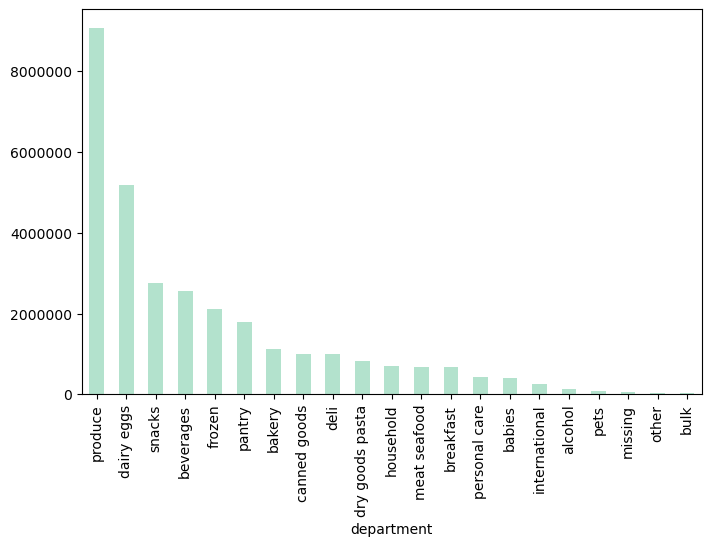

In [22]:

#create a figure space
department_bar_fig, ax = plt.subplots(figsize =(8, 5))
#create a bar chart in there
department_bar = df['department'].value_counts(dropna = False).plot.bar(colormap = 'Pastel2', ax = ax)
#stop scientific numbers
ax.yaxis.get_major_formatter().set_scientific(False)

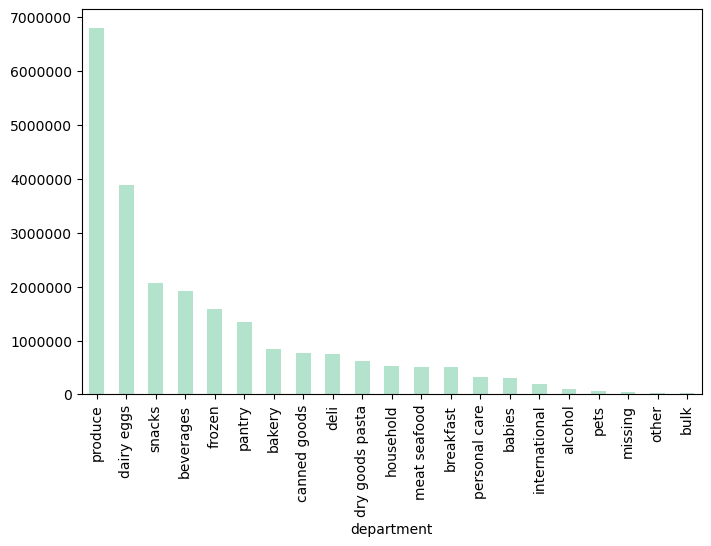

In [23]:
#parents bar
#create a figure space
parent_department_bar_fig, ax = plt.subplots(figsize =(8, 5))
#create a bar chart in there
parent_department_bar = df_parents['department'].value_counts(dropna = False).plot.bar(colormap = 'Pastel2', ax = ax)
#stop scientific numbers
ax.yaxis.get_major_formatter().set_scientific(False)

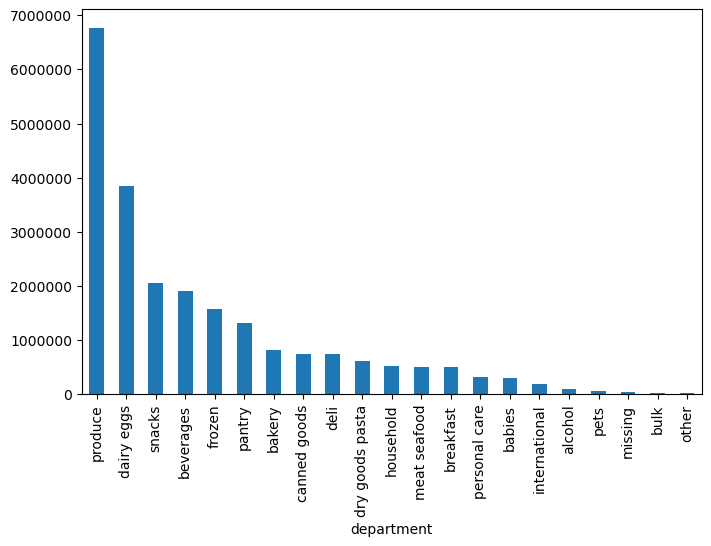

In [24]:
#low income parents
#create a figure space
low_income_parents_department_bar_fig, ax = plt.subplots(figsize =(8, 5))
#create a bar chart in there
low_income_parents_department_bar = df_parents.loc[df_parents['income_range'] == 'low']['department'].value_counts(dropna = False).plot.bar(colormap = 'tab20', ax = ax)
#stop scientific numbers
ax.yaxis.get_major_formatter().set_scientific(False)

## Single out the married no kids


In [25]:
# create a subset of married no kids
df_married_no_kids = df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] < 1)]

In [26]:
# plot their departments
df_married_no_kids['department'].value_counts(dropna = False)

Series([], Name: count, dtype: int64)

In [27]:
df_married_no_kids.shape

(0, 34)

#### There are none

In [28]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group', 'income_range'],
      dtype='object')